* Importar librerias

In [2]:
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import numpy as np
import matplotlib
import squarify
import networkx as nx
from wordcloud import WordCloud

* Cargamos los datos con la función read_csv()

In [50]:
data = pd.read_csv('Groceries_dataset.csv')

* Función head():
* Muestra por defecto las primeras 5 filas.
* Puede mostrar los elementos que querramos si pasamos un número entero a la funcion.

In [51]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


* info(): proporciona informacion sobre nuestra base de datos

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
Member_number      38765 non-null int64
Date               38765 non-null object
itemDescription    38765 non-null object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


* Visualizar nombre de comlumnas

In [53]:
data.columns.values

array(['Member_number', 'Date', 'itemDescription'], dtype=object)

In [54]:
data.shape

(38765, 3)

* Top 20 de productos con mas transacciones

In [55]:
top = data['itemDescription'].value_counts()

In [56]:
df = top.to_frame()
df['item'] = df.index
df['index'] = range(0, len(top))
df.set_index('index', inplace=True)
df = df.rename(columns={'item':'itemDescription',
                                   'itemDescription':'count'})
df.head() 

,count,itemDescription
index,,
0,2502,whole milk
1,1898,other vegetables
2,1716,rolls/buns
3,1514,soda
4,1334,yogurt


### Palabras clave de los productos mas vendidos 

* Utilizamos la libreria plotly para vizualizar las siguientes graficas

(-0.5, 1199.5, 999.5, -0.5)

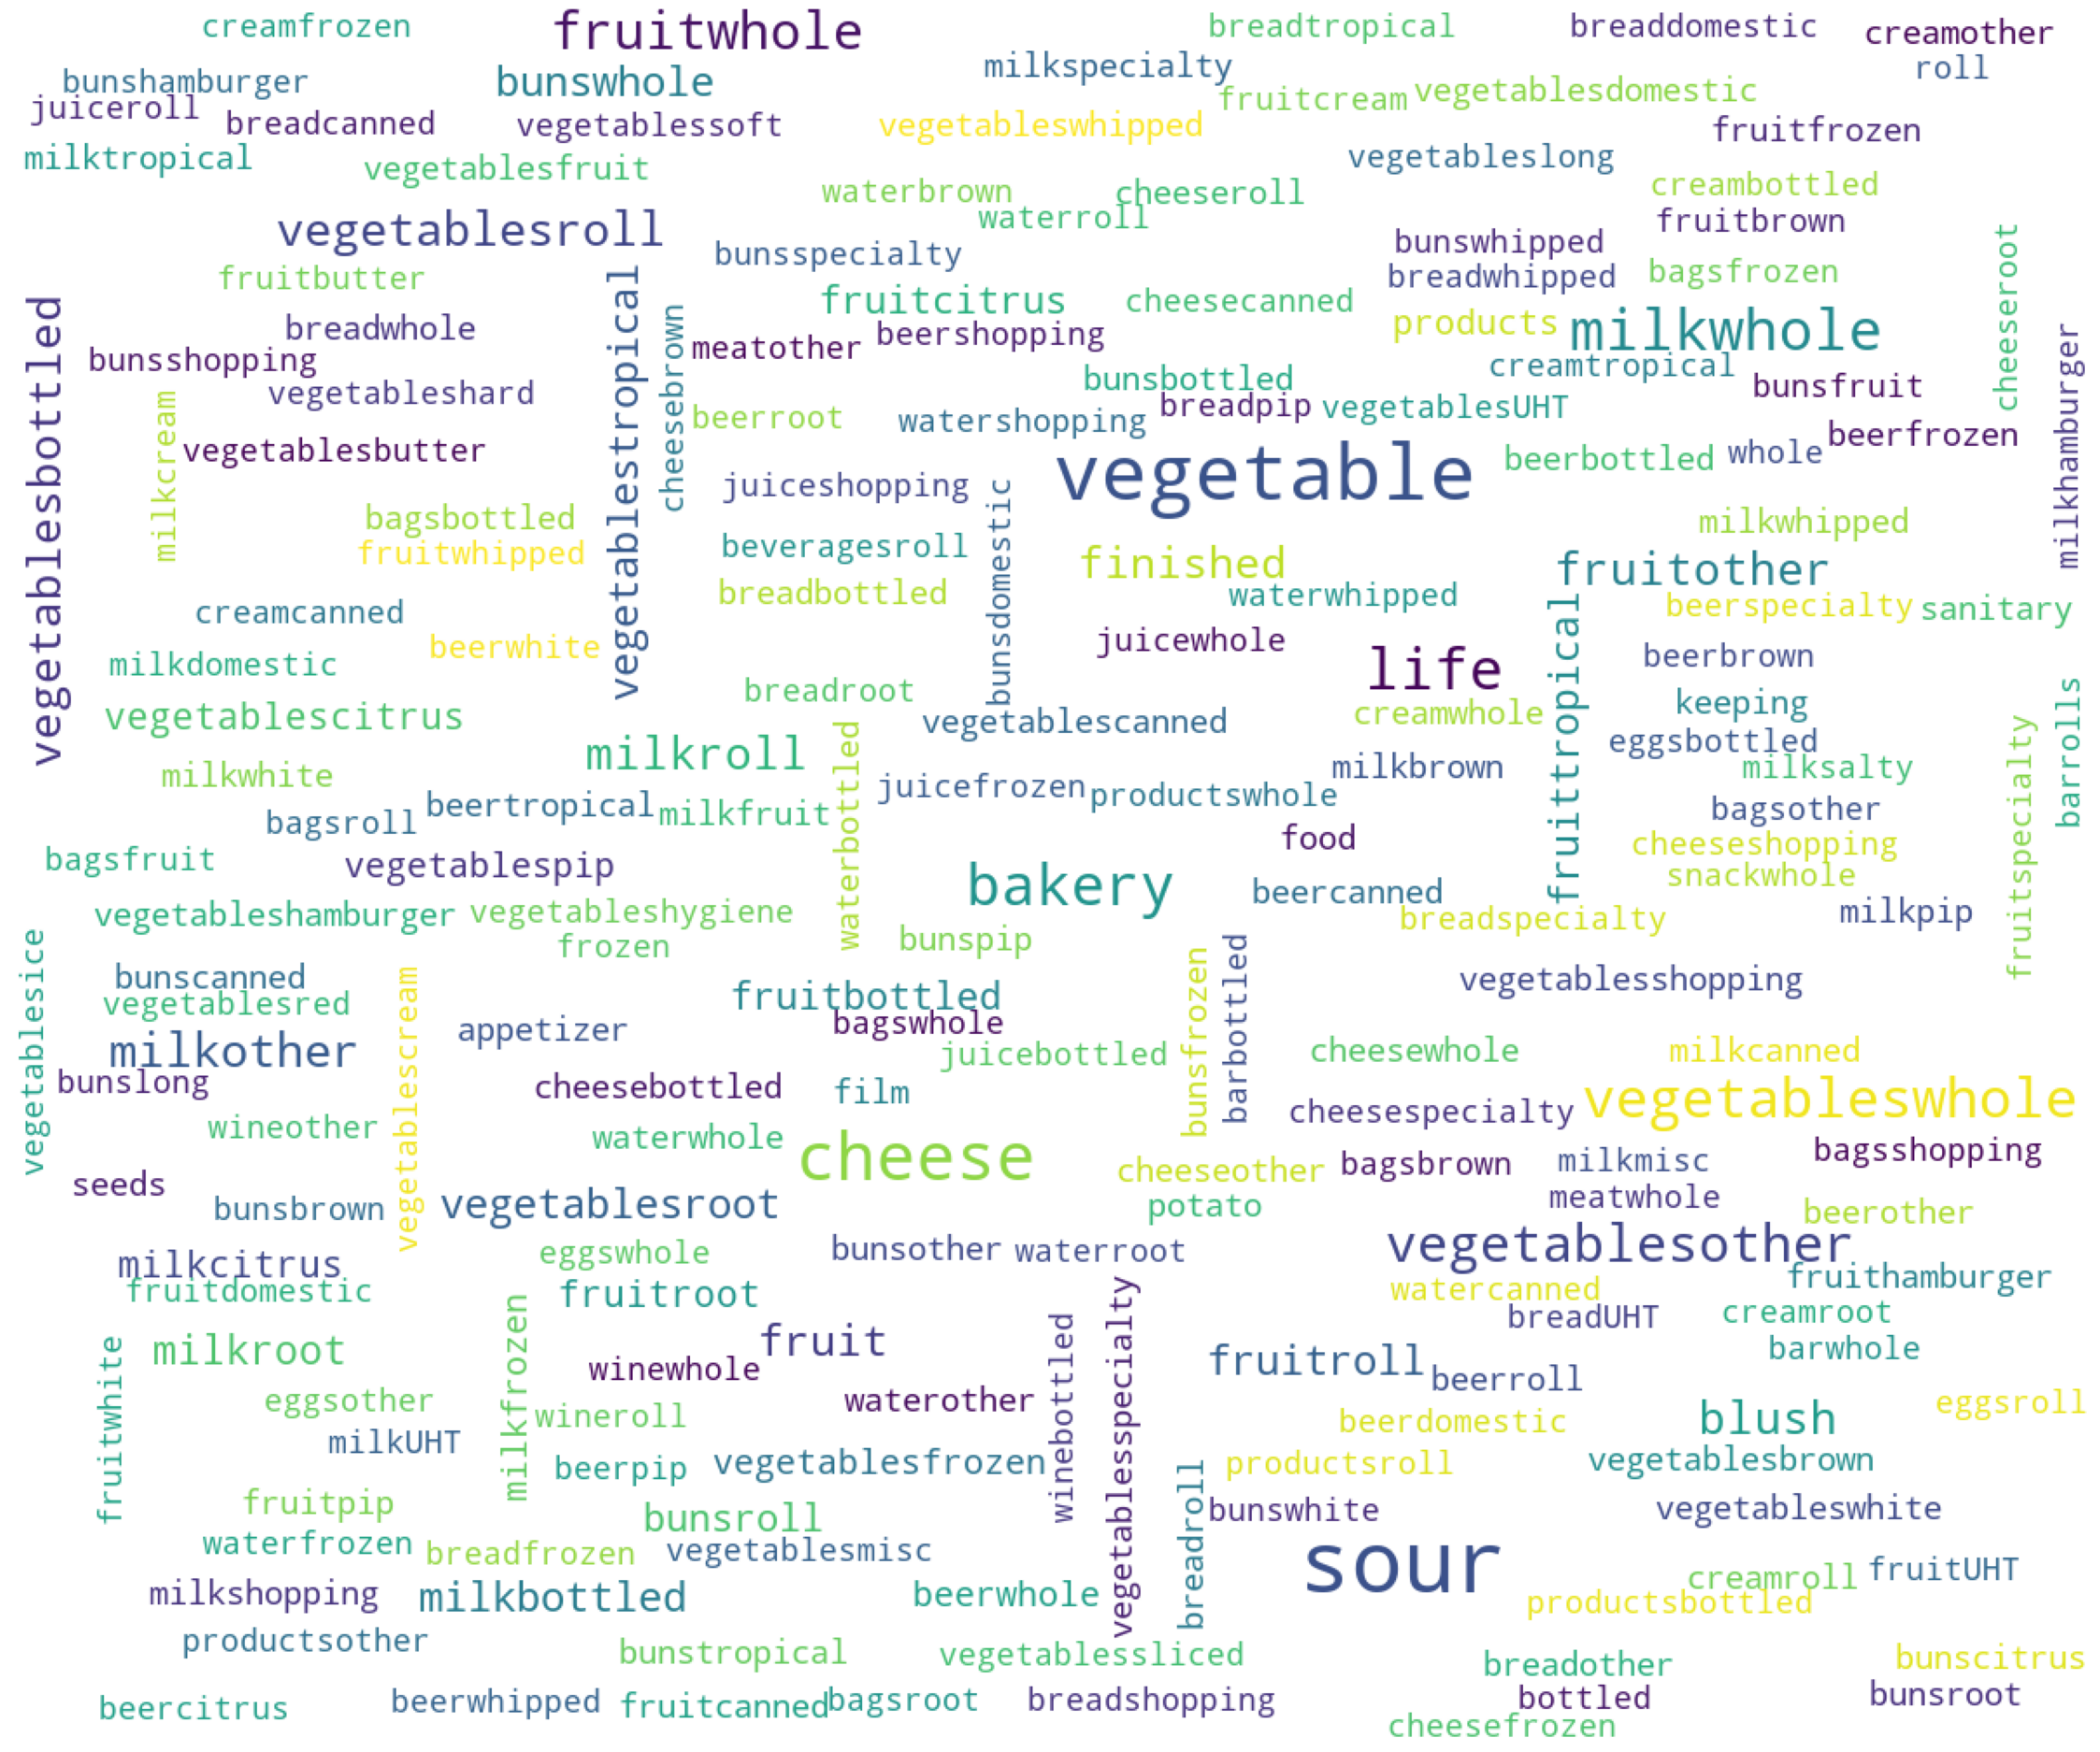

In [57]:
plt.subplots(figsize=(40,40))
wordcloud = WordCloud(background_color = 'white',
                          width=1200, height=1000,max_font_size = 50,
                      collocations=False).generate("".join(data['itemDescription']))

plt.imshow(wordcloud)
plt.axis('off')

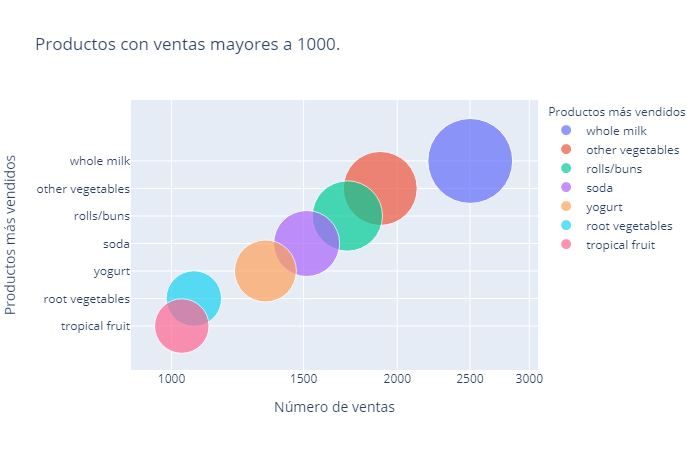

In [68]:
fig = px.scatter(df.query("count > 1000"), x="count", y="itemDescription",
         size="count", color="itemDescription",
                 hover_name="itemDescription", log_x=True, size_max=60,
            labels={'itemDescription':'Productos más vendidos','count':'Número de ventas'}
                , title="Productos con ventas mayores a 1000.",)
fig.show(renderer="png")
#fig.show()

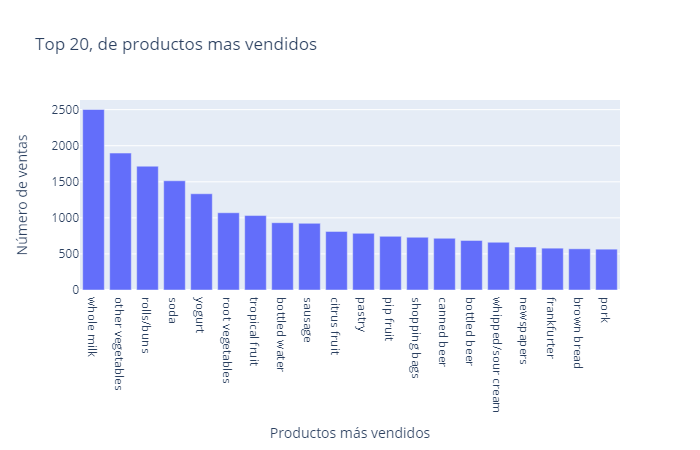

In [67]:
fig = px.bar(df[0:20],x='itemDescription', y='count', title="Top 20, de productos mas vendidos",
            labels={'itemDescription':'Productos más vendidos','count':'Número de ventas'})
fig.show(renderer="png")
#fig.show()

In [60]:
data["Year"] = data["Date"].str.split("-").str[-1]
data["Months_Year"] = data["Date"].str.split("-").str[1] + "-" + data["Date"].str.split("-").str[-1] 

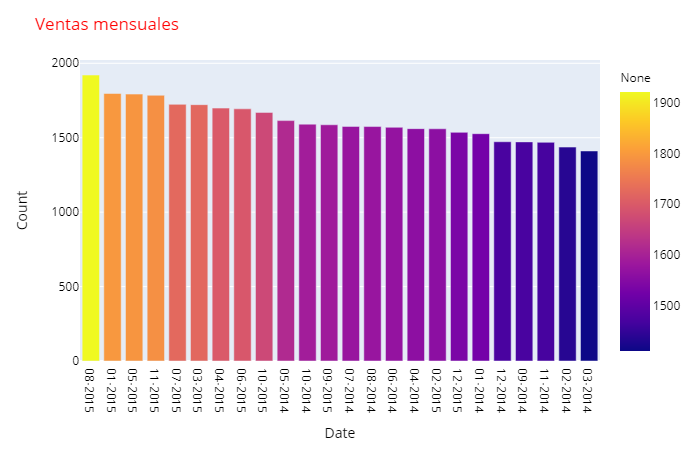

In [66]:
fig = px.bar(data["Months_Year"].value_counts(ascending=False), orientation="v", 
             color=data["Months_Year"].value_counts(ascending=False), 
             color_continuous_scale=px.colors.sequential.Plasma, 
             log_x=False, labels={'value':'Count', 'index':'Date','color':'None'})
fig.update_layout(
    font_color="black",
    title_font_color="red",
    legend_title_font_color="green",
    title_text="Ventas mensuales"
)

fig.show(renderer="png")
#fig.show()

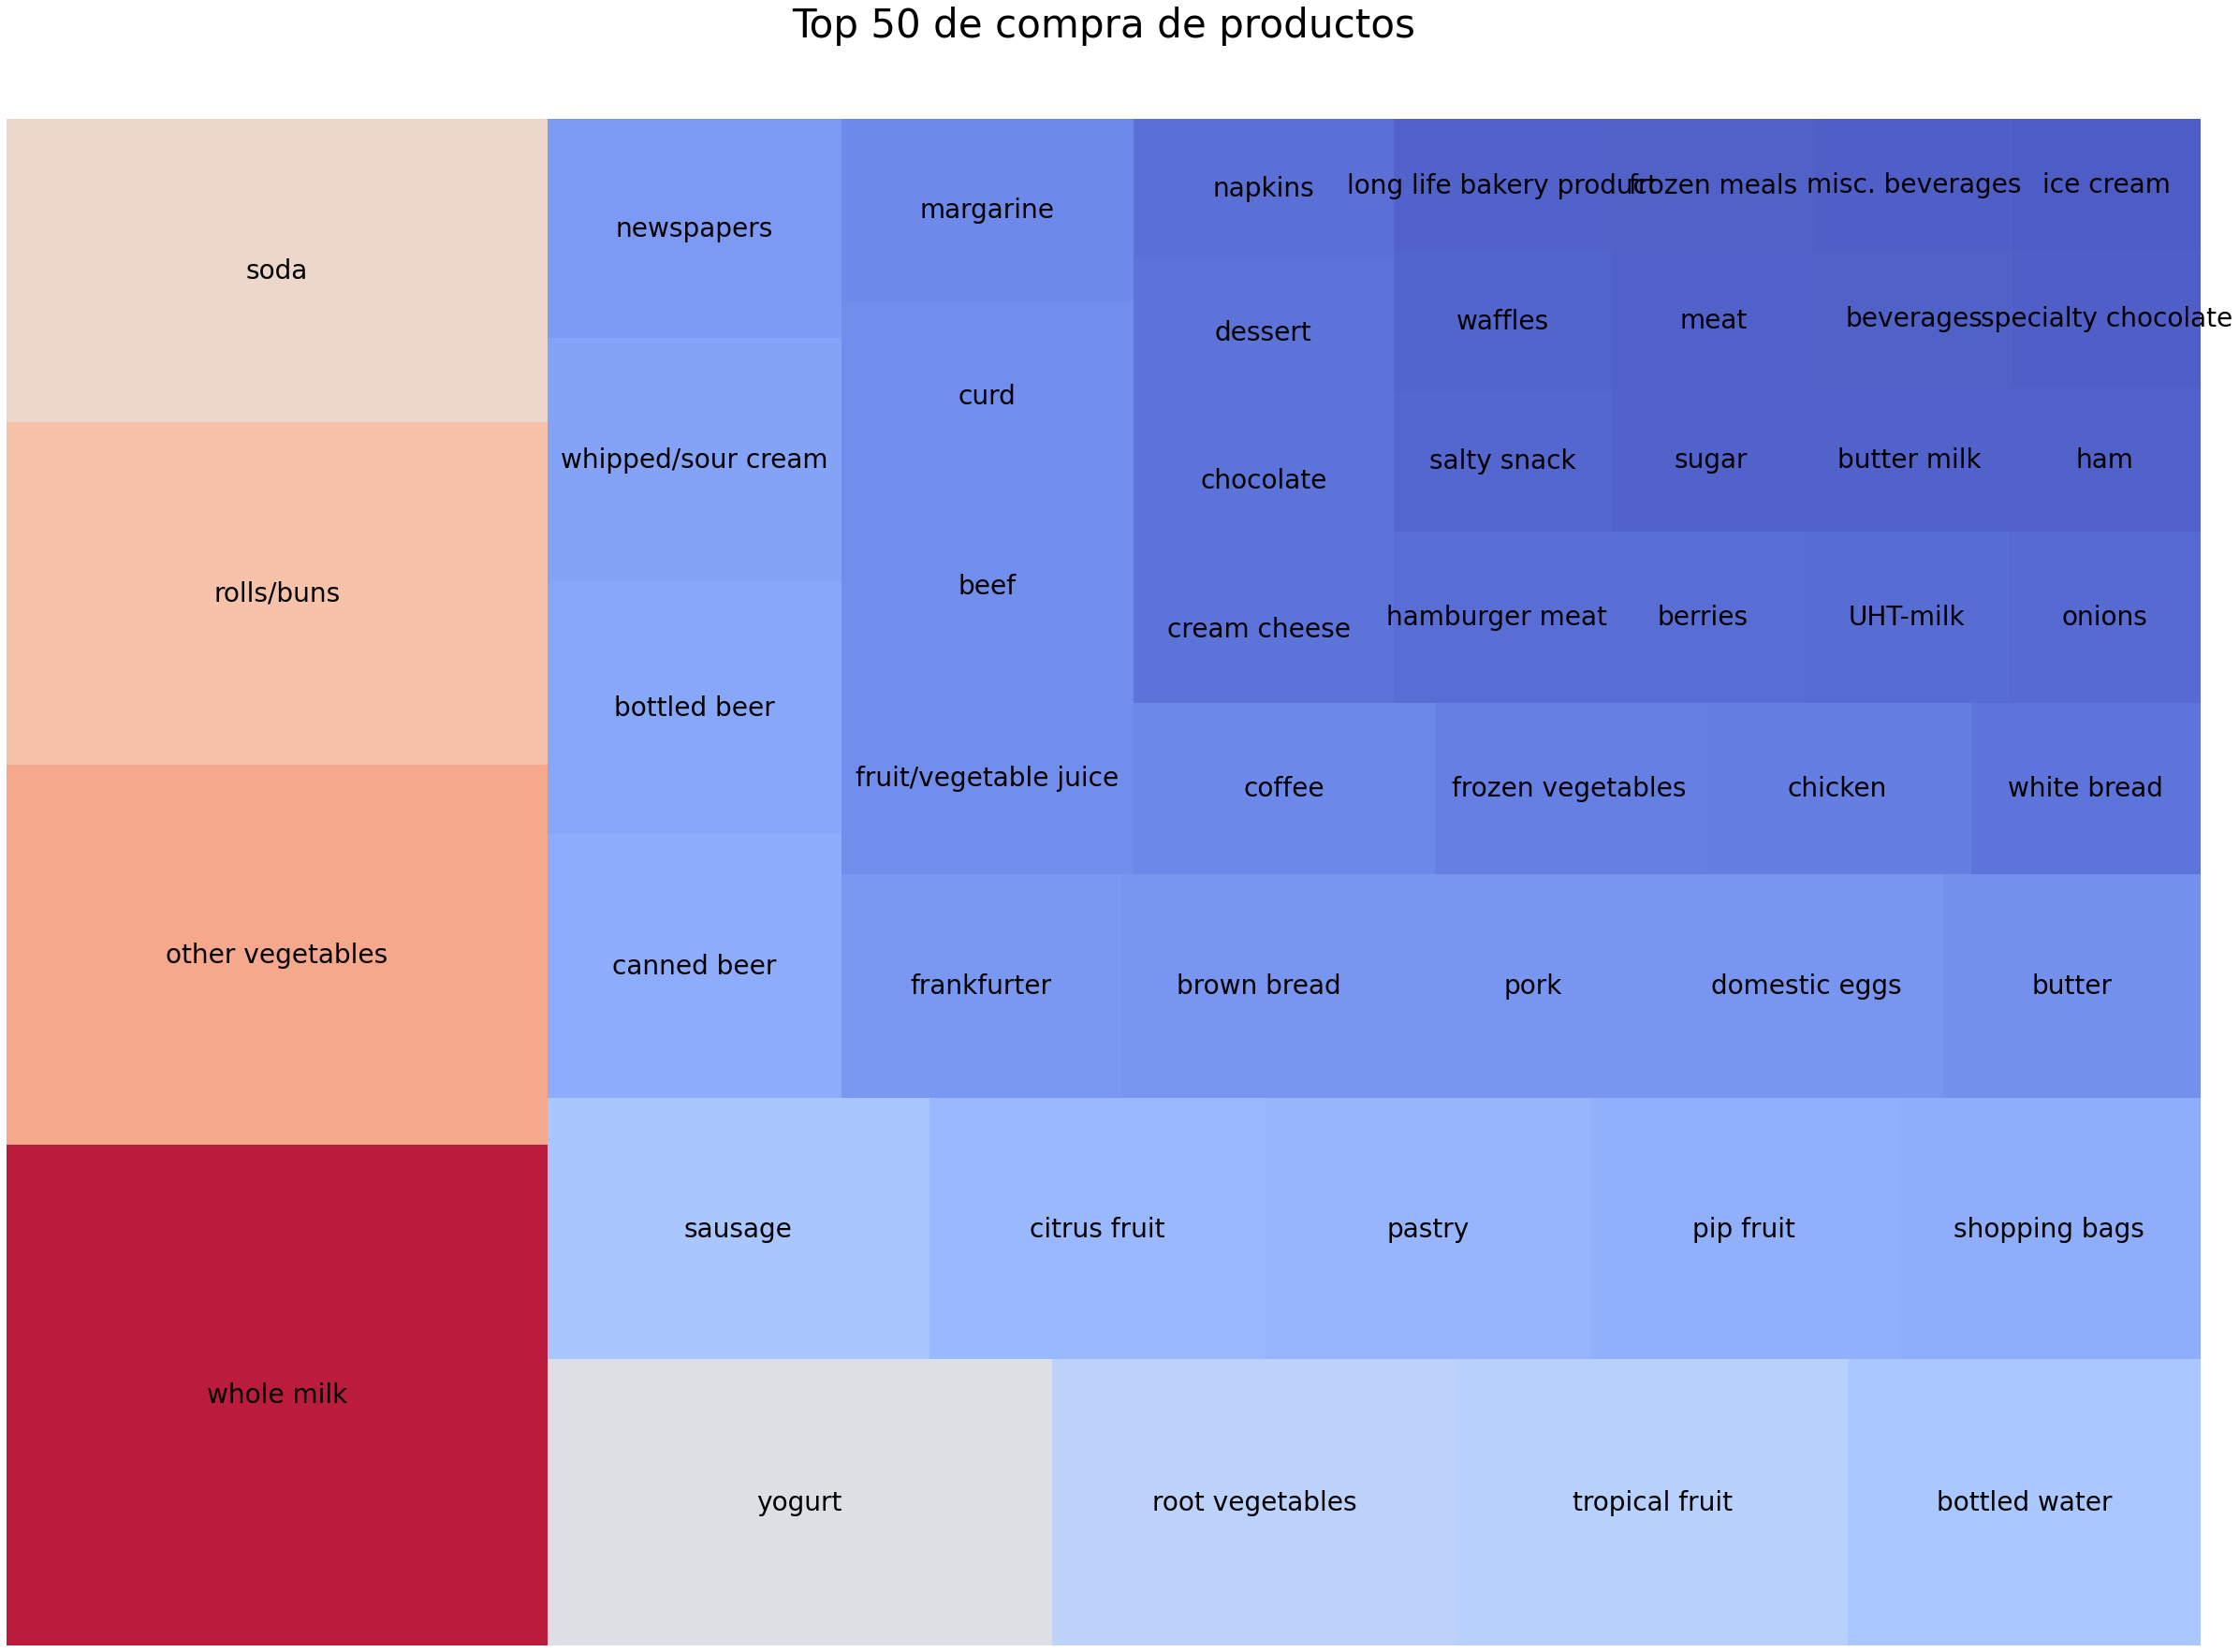

In [14]:
top50 = df[0:50]
fig, ax = plt.subplots()
cmap = matplotlib.cm.coolwarm
fig.set_size_inches(42, 30)

mini = min(top50["count"])
maxi = max(top50["count"])

norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in top50["count"]]

squarify.plot(sizes=top50["count"], label=top50["itemDescription"], alpha=0.9, color=colors,text_kwargs={'fontsize':28})
plt.axis('off')
plt.title("Top 50 de compra de productos",fontsize=42)
ttl = ax.title
ttl.set_position([.5, 1.05])

* Items totales

In [15]:
products  = data['itemDescription'].unique()

In [16]:
len(products)

167

* Proceso para crear variables dummie:

In [17]:
def createDummies(df,var_name):
    dummy = pd.get_dummies(data[var_name] )
    df = df.drop(var_name, axis = 1)
    df = pd.concat([df,dummy], axis = 1)
    return df

In [18]:
data.head()

,Member_number,Date,itemDescription,Year,Months_Year
0,1808,21-07-2015,tropical fruit,2015,07-2015
1,2552,05-01-2015,whole milk,2015,01-2015
2,2300,19-09-2015,pip fruit,2015,09-2015
3,1187,12-12-2015,other vegetables,2015,12-2015
4,3037,01-02-2015,whole milk,2015,02-2015


* Variables dummie

* Generamos variables dummie para poder utilizar el algoritmo apriori

In [19]:
data3 = createDummies(data,"itemDescription")

In [20]:
data3.shape

(38765, 171)

In [21]:
data3.head()

,Member_number,Date,Year,Months_Year,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,2015,07-2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,05-01-2015,2015,01-2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,19-09-2015,2015,09-2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,12-12-2015,2015,12-2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,01-02-2015,2015,02-2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


* Quitamos las columnas "Member_number","Date"
* Reseteamos el index

In [22]:
reportes = data3.groupby(["Member_number","Date"])[products[:]].sum()
reportes = reportes.reset_index()[products]

reportes.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Esta función realiza un cambio de numeros a palabras
* Solo si encuentra un 1 lo cambia por el nombre de la columna

In [65]:
def get_product_names(x):
    for product in products:
        if x[product] != 0:
            x[product] = product
    return x

reportes = reportes.apply(get_product_names, axis=1)
reportes.head()


,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
x = reportes.values
x = [sub[~(sub == 0)].tolist() for sub in x if sub[sub != 0].tolist()]
transactions = x

* Utilizamos algoritmo de reglas de asociacion 
* Covertimos nuestras reglas a formato lista

In [25]:
association_rules = apriori(transactions,min_support=0.00030, min_confidance=0.01, min_lift=3, min_length=2, target="rules")

association_results = list(association_rules)

* Creamos un nuevo dataFrame que contendra nuestras reglas de asociación.

In [37]:
reglas = pd.DataFrame(columns = ['from','to','confidence','support','lift'])

* Rellenamos el dataFrame

In [38]:
i = 0
for item in association_results:

    pair = item[0] 
    items = [x for x in pair]
    reglas.loc[i]=[items[0] , items[1] , str(item[2][0][2]) , str(item[1]), str(item[2][0][3])]
    i+=1

* Pintamos un grafo con nuestras reglas de asociación

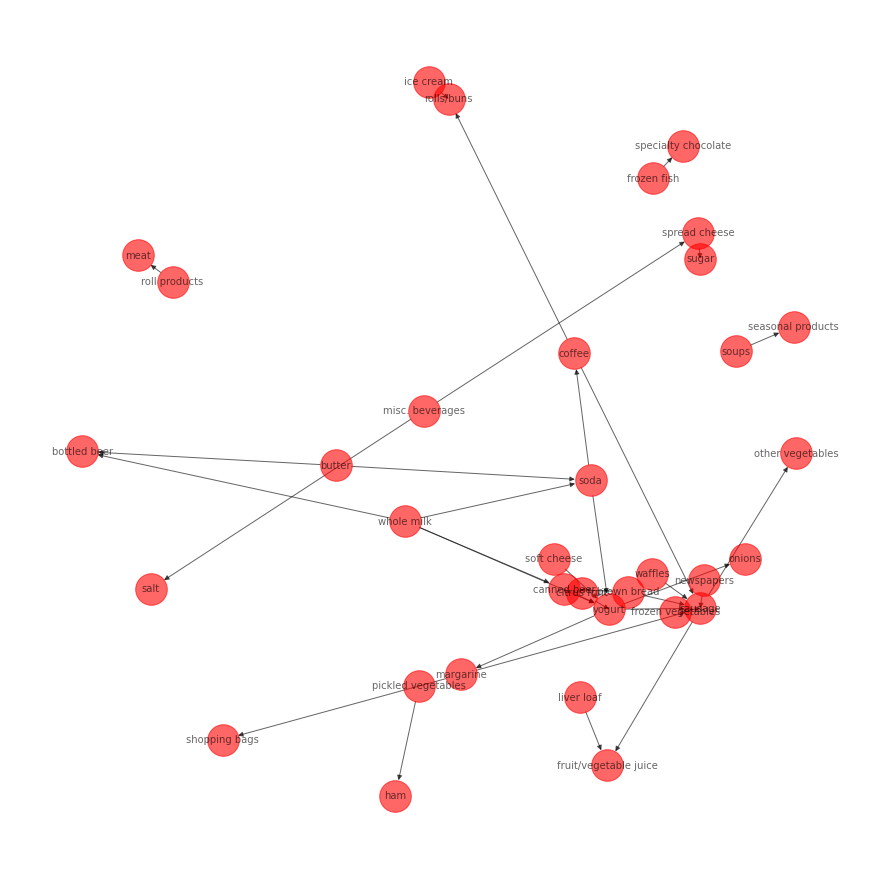

In [36]:
G=nx.from_pandas_edgelist(reglas, 'from', 'to', create_using=nx.DiGraph() )
       
nx.spring_layout(G,k=0.5,iterations=len(reglas))

plt.figure(3,figsize=(12,12))

nx.draw(G, with_labels=True, node_size=1000, alpha=0.6,
        arrows=True,font_size=10,node_color = 'red',
       )
plt.show()

* Generamos un archivo csv con nuestras reglas de asociación

In [40]:
reglas.to_csv("AsociacionReglas.csv")

* Comprobamos que exista el archivo

In [46]:
pd.read_csv("AsociacionReglas.csv").head()

,Unnamed: 0,from,to,confidence,support,lift
0,0,frozen fish,specialty chocolate,0.049020,0.000334,3.068956
1,1,liver loaf,fruit/vegetable juice,0.011788,0.000401,3.527623
2,2,pickled vegetables,ham,0.031250,0.000535,3.489506
3,3,roll products,meat,0.019841,0.000334,3.620548
4,4,misc. beverages,salt,0.021186,0.000334,3.561941
